In [16]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [17]:
# Ref: Twitter.com or "Top 100 News Media Twitter Accounts:" 
# https://memeburn.com/2010/09/the-100-most-influential-news-media-twitter-accounts/


--------------------------------
News Media Handle:  BBCWorld
-9.156499999999996   BBCWorld
--------------------------------
News Media Handle:  CBSNews
-23.169000000000004   CBSNews
--------------------------------
News Media Handle:  CNN
-9.725   CNN
--------------------------------
News Media Handle:  FoxNews
-14.597999999999995   FoxNews
--------------------------------
News Media Handle:  nytimes
-10.731000000000002   nytimes


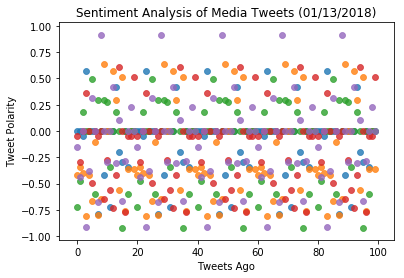

In [18]:
# Top News Media Handles
handles = ['BBCWorld', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']

# create a new dataframe for handles
news_df = pd.DataFrame({'Handles': handles})

# create a list of sentiments
sentiment_list = []

for target_user in handles: 
    
    try:
    
        print("--------------------------------")
        print("News Media Handle: ", target_user)
        
        # Counter
        counter = 1

        # Variables for holding sentiments
        sentiments = []
        compound_list = []
        pos_list = []
        neg_list = []
        neu_list = []
        
        # compound_sum = 0

        # Loop through 5 pages of tweets (total 100 tweets)
        for x in range(5):

              # Get all tweets 
              public_tweets = api.user_timeline(target_user)

              # Loop through all tweets 
              for tweet in public_tweets:

                  # Run Vader Analysis on each tweet
                  compound = analyzer.polarity_scores(tweet["text"])["compound"]
                  compound_list.append(compound)
                  pos = analyzer.polarity_scores(tweet["text"])["pos"]
                  pos_list.append(pos)
                  neu = analyzer.polarity_scores(tweet["text"])["neu"]
                  neu_list.append(neu)
                  neg = analyzer.polarity_scores(tweet["text"])["neg"]
                  neg_list.append(neg)

                  tweets_ago = counter
                
                  # compound_sum = compound_sum + int(compound)

                  # Add sentiments for each tweet into an array
                  sentiments.append({"Date": tweet["created_at"], "Compound": compound,"Positive": pos,"Neutral" : neu,"Negative": neg,"Tweets Ago": counter})
                  
                  # Add to counter 
                  counter = counter + 1
                            
        sentiments_pd = pd.DataFrame.from_dict(sentiments)
        plt.scatter(np.arange(len(sentiments_pd["Compound"])), sentiments_pd["Compound"], marker="o", linewidth=0.8, alpha=0.8)
        total_compound = sentiments_pd["Compound"].sum()
        print(total_compound, " ", target_user)
        
        sentiment_list.append(total_compound)
        
        # sentiment_list[target_user] = total_compound
        # print(sentiment_list[target_user])
        
        # Add sentiment to the sentiment list
        # sentiment_list.append(sentiment)
        # time = tweet["created at"]
        
        # Print the Sentiments and time
        # print(sentiment)
        # print("")
        
        # print(time)
        # print("")
        
        # news_df = pd.DataFrame.setvalue("Handle", "Time", "Sentiment")                               
        # Utilize JSON dumps to generate a pretty-printed json
        # print(json.dumps(tweet, sort_keys=True, indent=4, separators=(',', ': ')))
        
    except:
        continue

current_date = time.strftime("%m/%d/%Y")

plt.title("Sentiment Analysis of Media Tweets " + "(" + current_date + ")")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.savefig("MTweets_Scatter.png")

plt.show()
        

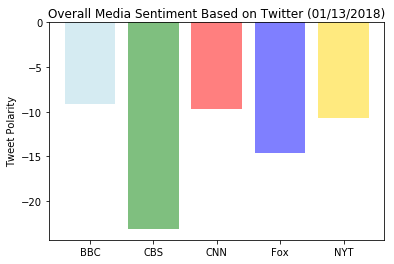

In [19]:
x_ticks = ("BBC","CBS","CNN","Fox","NYT")
colors = ("lightblue","green","red","blue","gold")

x_pos = [i for i, _ in enumerate(x_ticks)]

plt.bar(x_pos, sentiment_list,  color=colors, align="center", alpha=0.5)
plt.xticks(x_pos, x_ticks)
                   
plt.title("Overall Media Sentiment Based on Twitter " + "(" + current_date + ")")
plt.ylabel("Tweet Polarity") 

plt.savefig("MTweets_Bars.png")
plt.show()